# Stock Prediction Project

## by Zachary Wing

## Vonage Holdings Corp. (VG)

### Import

In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('VG.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-03,4.83,4.92,4.76,4.91,4.91,1206100
1,2015-06-04,4.89,4.93,4.84,4.89,4.89,1051500
2,2015-06-05,4.86,4.93,4.78,4.93,4.93,909000
3,2015-06-08,4.94,4.94,4.78,4.80,4.80,717400
4,2015-06-09,4.80,4.81,4.72,4.72,4.72,685200


Data is last 5 years from 2015-06-03 to 2020-06-02

### Plotting the Figure

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


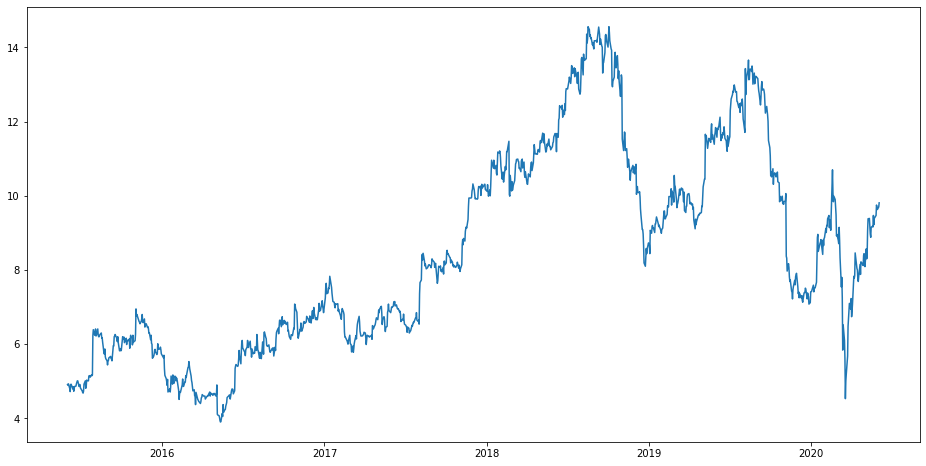

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

### Creating target variable

In [3]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]



### Split

In [4]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# So I set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:1006]
valid = new_data[1006:]

valid.head()


,Date,Close
1006,2019-06-03 00:00:00,11.58
1007,2019-06-04 00:00:00,11.81
1008,2019-06-05 00:00:00,11.78
1009,2019-06-06 00:00:00,11.85
1010,2019-06-07 00:00:00,11.85


In [5]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 2)

 Shape of training set:
(1006, 2)

 Shape of validation set:
(253, 2)


### Assign Predictions Moving Average

In [6]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/253
    preds.append(b)

In [7]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
2.035399664602057


### Plot with predictions Moving Average

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


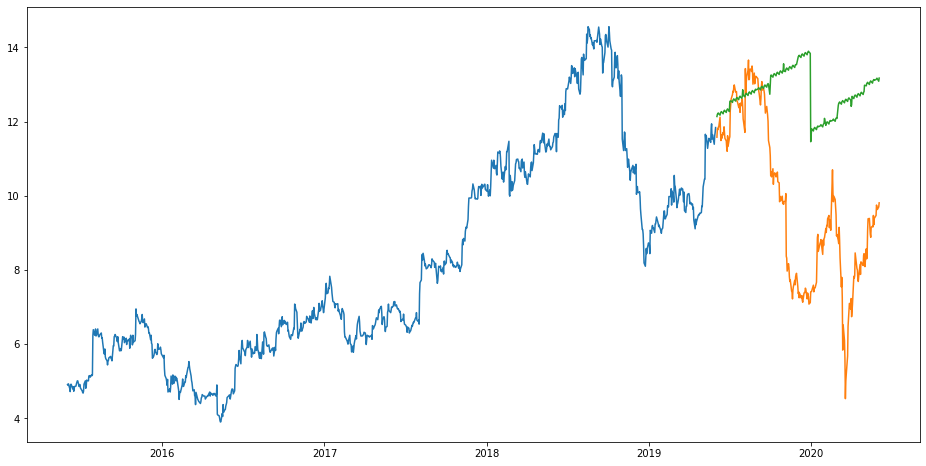

In [25]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### Linear Regression

In [9]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


#creating a separate dataset
lin_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

#sorting
lin_data = lin_data.sort_index(ascending=True, axis=0)

for i in range(0,len(data)):
    lin_data['Date'][i] = data['Date'][i]
    lin_data['Close'][i] = data['Close'][i]
    
lin_data.head()

,Date,Close
0,2015-06-03 00:00:00,4.91
1,2015-06-04 00:00:00,4.89
2,2015-06-05 00:00:00,4.93
3,2015-06-08 00:00:00,4.8
4,2015-06-09 00:00:00,4.72


### Create Additional Features

In [10]:
#create features
# ‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, 
# ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’




lin_data['Year']=0
lin_data['Month']=0
lin_data['Week']=0
lin_data['Day']=0
lin_data['Dayofweek']=0
lin_data['Dayofyear']=0

lin_data['Is_month_end']=0
lin_data['Is_month_start']=0
lin_data['Is_quarter_end']=0
lin_data['Is_quarter_start']=0
lin_data['Is_year_end']=0
lin_data['Is_year_start']=0
lin_data['mon_fri']=0




#lin_data['Month'] = lin_data.Date.astype('datetime64[%M]')
#lin_data['Week'] = lin_data.Date.astype('datetime64[%W]')

for i in range(0,len(lin_data)):
    lin_data['Year'][i]=int(lin_data['Date'][i].year)
    lin_data['Month'][i]=int(lin_data['Date'][i].month)
    lin_data['Week'][i]=int(lin_data['Date'][i].strftime('%U'))+1  #first week is 1
    lin_data['Day'][i]=int(lin_data['Date'][i].day)
    lin_data['Dayofweek'][i]=int(lin_data['Date'][i].strftime('%w'))+1 #week start on sunday with Monday = 2
    lin_data['Dayofyear'][i]=int(lin_data['Date'][i].strftime('%j'))
    
    if(lin_data['Day'][i]==1):
        lin_data['Is_month_start'][i]=1
          
    
    if(lin_data['Month'][i]==2): # Feb
        if(lin_data['Day'][i]==29): #2016 and 2020
            lin_data['Is_month_end'][i]=1
        if(lin_data['Day'][i]==28): #2016 and 2020 are leap years so not these ones
            if(lin_data['Year'][i]!=2016):
                if(lin_data['Year'][i]!=2020):
                    lin_data['Is_month_end'][i]=1
                    
    if(lin_data['Day'][i]==31):
        lin_data['Is_month_end'][i]=1
        
    
    if(lin_data['Day'][i]==30):
        # Apr Jun Sep Nov
        if(lin_data['Month'][i]== 4):
            lin_data['Is_month_end'][i]=1
        if(lin_data['Month'][i]== 6):
            lin_data['Is_month_end'][i]=1
        if(lin_data['Month'][i]== 9):
            lin_data['Is_month_end'][i]=1
        if(lin_data['Month'][i]== 11):
            lin_data['Is_month_end'][i]=1
    
#Quarter 1 (Q1): January 1 - March 31.
#Quarter 2 (Q2): April 1 - June 30.
#Quarter 3 (Q3): July 1 - September 30.
#Quarter 4 (Q4): October 1 - December 31.
    
    if(lin_data['Day'][i]==1):
        if(lin_data['Month'][i]== 1):
            lin_data['Is_quarter_start'][i]=1
        if(lin_data['Month'][i]== 4):
            lin_data['Is_quarter_start'][i]=1
        if(lin_data['Month'][i]== 7):
            lin_data['Is_quarter_start'][i]=1
        if(lin_data['Month'][i]== 10):
            lin_data['Is_quarter_start'][i]=1
            
            
            
    if(lin_data['Day'][i]==31):
        if(lin_data['Month'][i]== 3):
            lin_data['Is_quarter_end'][i]=1
        if(lin_data['Month'][i]== 12):
            lin_data['Is_quarter_end'][i]=1
            
    if(lin_data['Day'][i]==30):
        if(lin_data['Month'][i]== 6):
            lin_data['Is_quarter_end'][i]=1
        if(lin_data['Month'][i]== 9):
            lin_data['Is_quarter_end'][i]=1

    
    
    
    if(lin_data['Dayofyear'][i]==1):
        lin_data['Is_year_start'][i]=1
    
    
    if(lin_data['Dayofyear'][i]==366):
        lin_data['Is_year_end'][i]=1
    
    if(lin_data['Dayofyear'][i]==365):
        if(lin_data['Year'][i]!=2016):
            if(lin_data['Year'][i]!=2020):
                lin_data['Is_year_end'][i]=1
        
 
    if (lin_data['Dayofweek'][i] == 2 or lin_data['Dayofweek'][i] == 6): #If Mon or Fri
        lin_data['mon_fri'][i] = 1
    else:
        lin_data['mon_fri'][i] = 0


        
     





/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zacharywing/opt/anaconda3/lib/python3.7/si

In [11]:
lin_data.head()

,Date,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,2015-06-03 00:00:00,4.91,2015,6,23,3,4,154,0,0,0,0,0,0,0
1,2015-06-04 00:00:00,4.89,2015,6,23,4,5,155,0,0,0,0,0,0,0
2,2015-06-05 00:00:00,4.93,2015,6,23,5,6,156,0,0,0,0,0,0,1
3,2015-06-08 00:00:00,4.8,2015,6,24,8,2,159,0,0,0,0,0,0,1
4,2015-06-09 00:00:00,4.72,2015,6,24,9,3,160,0,0,0,0,0,0,0


In [12]:
lin_data.tail()

,Date,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
1254,2020-05-27 00:00:00,9.75,2020,5,22,27,4,148,0,0,0,0,0,0,0
1255,2020-05-28 00:00:00,9.7,2020,5,22,28,5,149,0,0,0,0,0,0,0
1256,2020-05-29 00:00:00,9.63,2020,5,22,29,6,150,0,0,0,0,0,0,1
1257,2020-06-01 00:00:00,9.7,2020,6,23,1,2,153,0,1,0,0,0,0,1
1258,2020-06-02 00:00:00,9.81,2020,6,23,2,3,154,0,0,0,0,0,0,0


### Split

In [13]:
lin_data.index = lin_data['Date']

#split into train and validation
lin_train = lin_data[:1006]
lin_valid = lin_data[1006:]

lin_x_train = lin_train.drop('Close', axis=1)
lin_x_train = lin_x_train.drop('Date', axis=1)
lin_y_train = lin_train['Close']
lin_x_valid = lin_valid.drop('Close', axis=1)
lin_x_valid = lin_x_valid.drop('Date', axis=1)
lin_y_valid = lin_valid['Close']

In [14]:
lin_x_train.head()

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
Date,,,,,,,,,,,,,
2015-06-03,2015,6,23,3,4,154,0,0,0,0,0,0,0
2015-06-04,2015,6,23,4,5,155,0,0,0,0,0,0,0
2015-06-05,2015,6,23,5,6,156,0,0,0,0,0,0,1
2015-06-08,2015,6,24,8,2,159,0,0,0,0,0,0,1
2015-06-09,2015,6,24,9,3,160,0,0,0,0,0,0,0


In [15]:
lin_y_train.head()

Date
2015-06-03    4.91
2015-06-04    4.89
2015-06-05    4.93
2015-06-08     4.8
2015-06-09    4.72
Name: Close, dtype: object

In [16]:
#implement linear regression    
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(lin_x_train,lin_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#make predictions and find the rmse
preds = model.predict(lin_x_valid)
rms=np.sqrt(np.mean(np.power((np.array(lin_y_valid)-np.array(preds)),2)))
rms

3.801801708733803

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


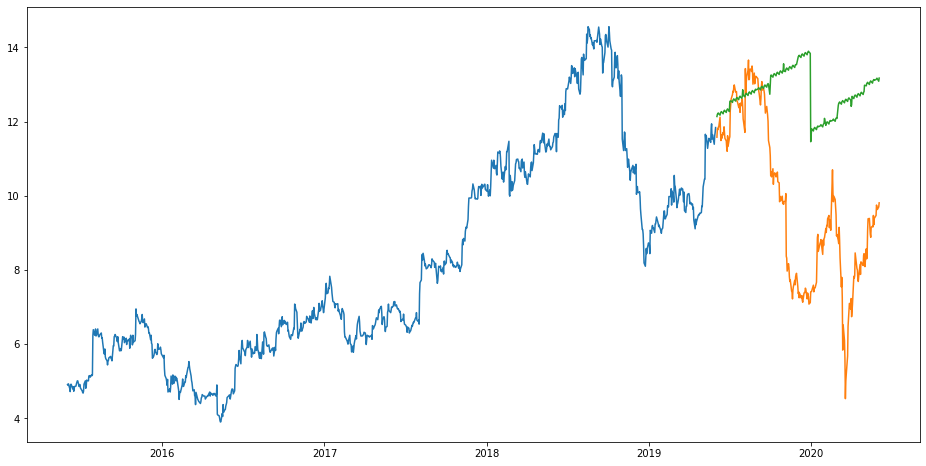

In [26]:
#plot
lin_valid['Predictions'] = 0
lin_valid['Predictions'] = preds

#lin_valid.head()
#lin_valid.index = lin_data[:1006].index
#lin_train.index = lin_data[1006:].index

plt.figure(figsize=(16,8))
plt.plot(lin_train['Close'])
plt.plot(lin_valid[['Close', 'Predictions']])

### Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output




In [19]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [20]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1006,:]
valid = dataset[1006:,:]


In [21]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 81s - loss: 0.0033


In [23]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.5710266265396969

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


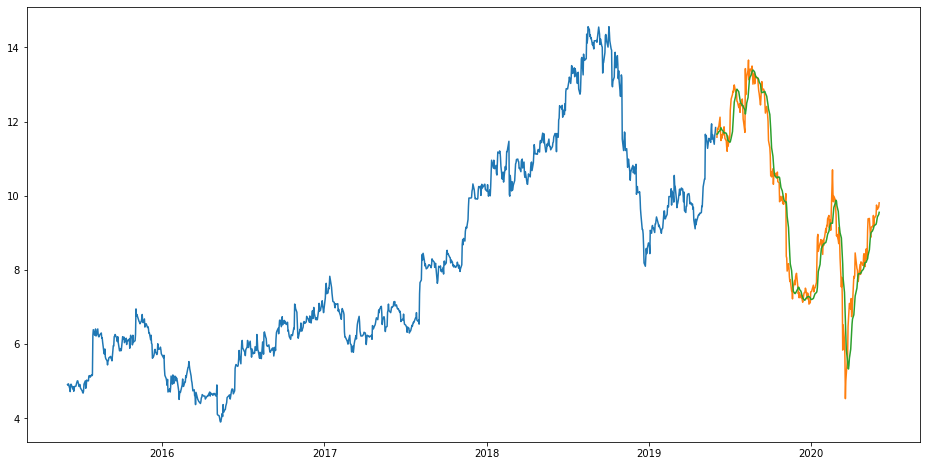

In [29]:
#for plotting
train = new_data[:1006]
valid = new_data[1006:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

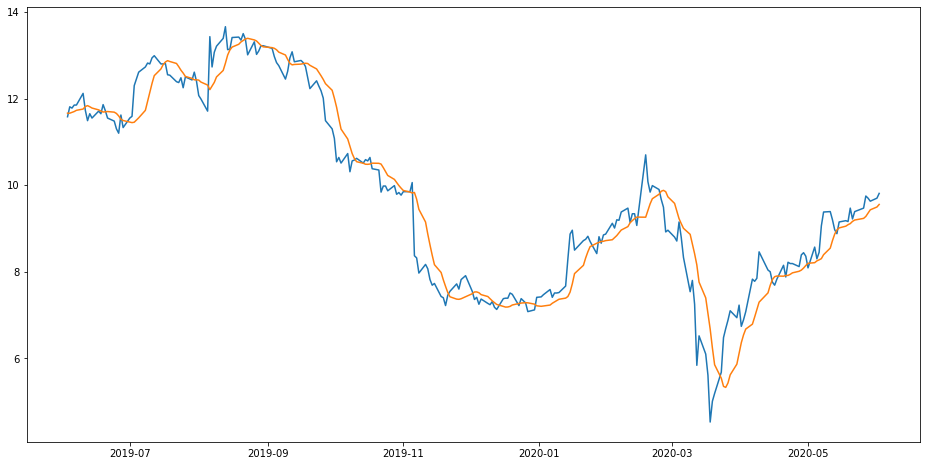

In [30]:
plt.figure(figsize=(16,8))
plt.plot(valid[['Close','Predictions']])